In [2]:
#lib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix,roc_curve ,roc_auc_score 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# clear warning messages
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Dataset\DSData-master\DSData-master\happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

In [5]:
def show_nulls(df):
    total_nan = df.isnull().sum()
    perc_nan = total_nan/len(df)*100
    
    return total_nan, perc_nan

In [6]:
print('Total nulos ', show_nulls(df=df)[0])

Total nulos  Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [7]:
print('Porcentaje de nulos ', show_nulls(df=df)[1])

Porcentaje de nulos  Country                          0.0
Region                           0.0
Happiness Rank                   0.0
Happiness Score                  0.0
Standard Error                   0.0
Economy (GDP per Capita)         0.0
Family                           0.0
Health (Life Expectancy)         0.0
Freedom                          0.0
Trust (Government Corruption)    0.0
Generosity                       0.0
Dystopia Residual                0.0
dtype: float64


In [8]:
df['Standard Error']

0      0.03411
1      0.04884
2      0.03328
3      0.03880
4      0.03553
        ...   
153    0.03464
154    0.03656
155    0.05015
156    0.08658
157    0.06727
Name: Standard Error, Length: 158, dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Our data seems pretty much clean. Additionally, there are no missing values in our dataset, which will accelerate our analysis. We don’t have to put any time to handle the missing values.

In [10]:
import seaborn as sns

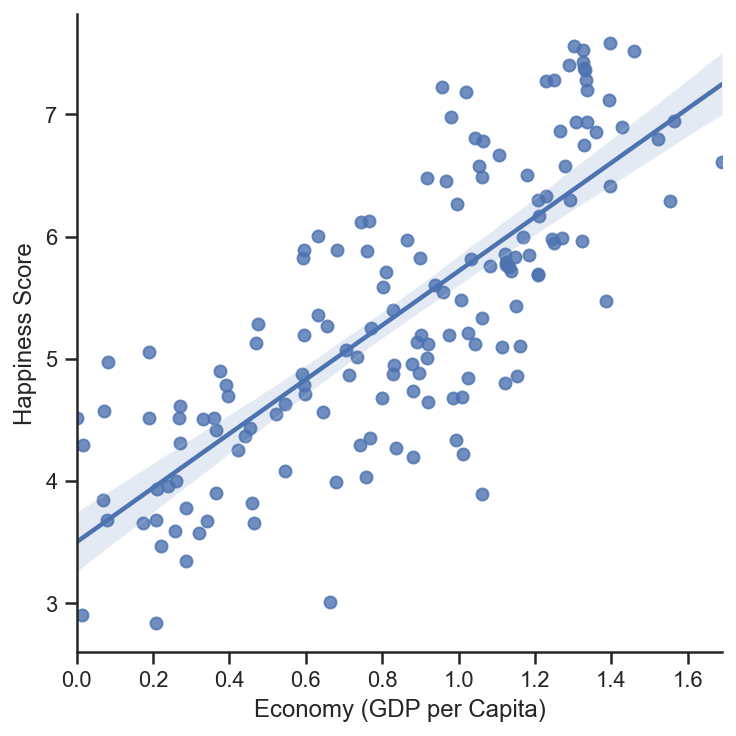

In [47]:

sns.lmplot(x="Economy (GDP per Capita)", y = 'Happiness Score', data = df)

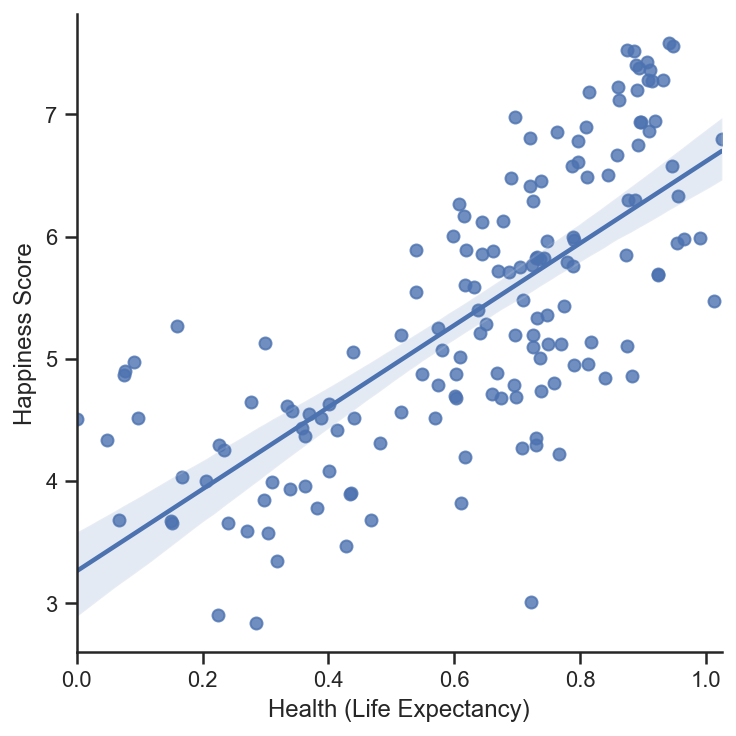

In [51]:

sns.lmplot(x="Health (Life Expectancy)", y = 'Happiness Score', data = df)

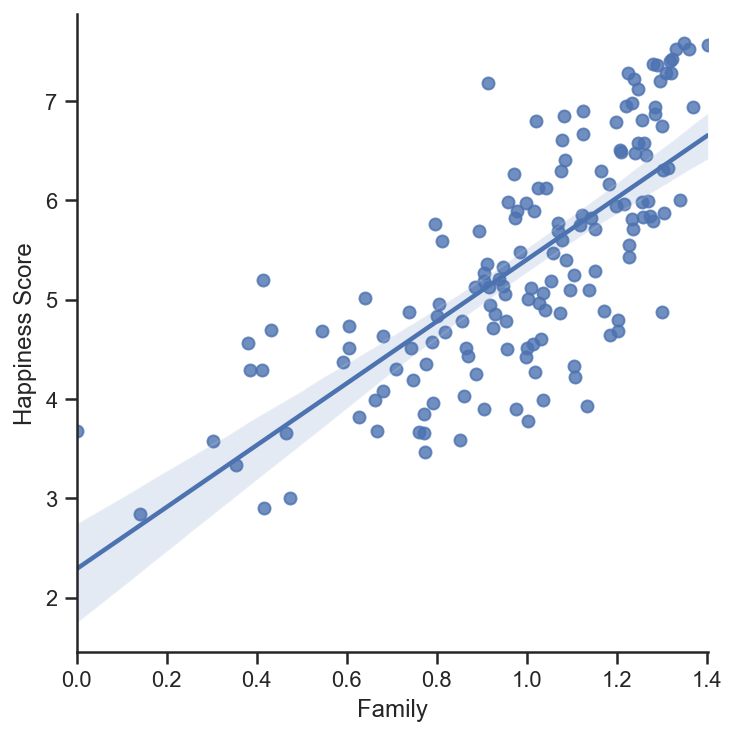

In [52]:

sns.lmplot(x="Family", y = 'Happiness Score', data = df)

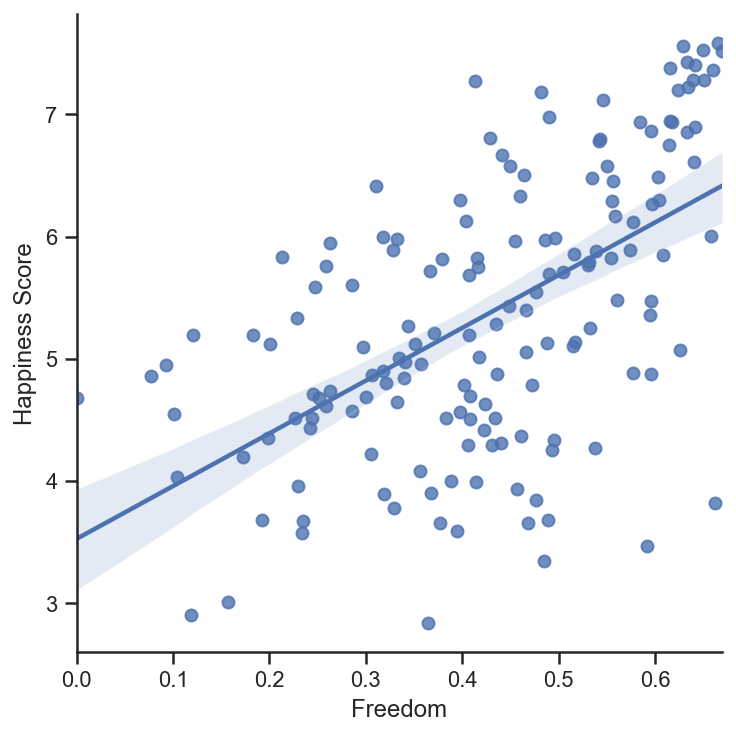

In [53]:

    sns.lmplot(x="Freedom", y = 'Happiness Score', data = df)

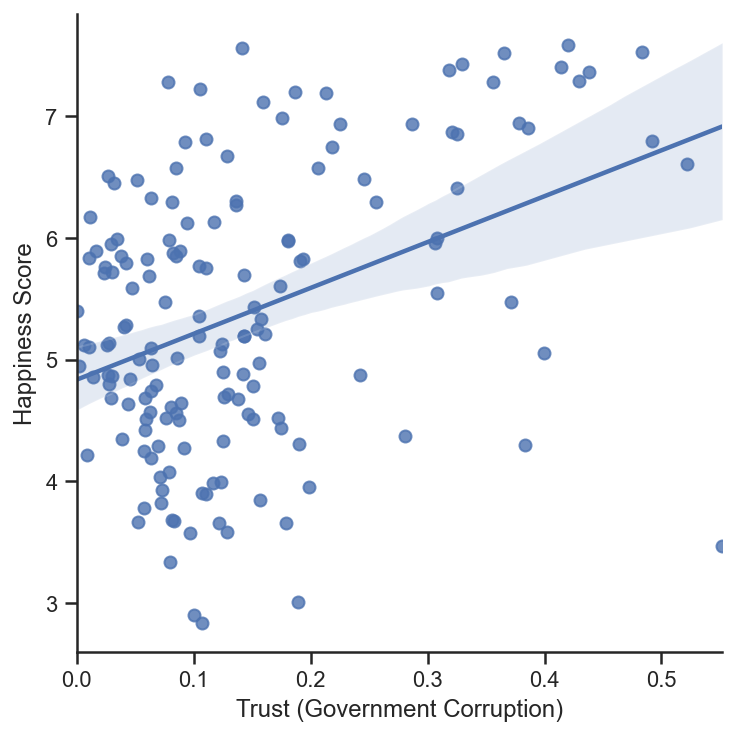

In [54]:

sns.lmplot(x="Trust (Government Corruption)", y = 'Happiness Score', data = df)

In [56]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

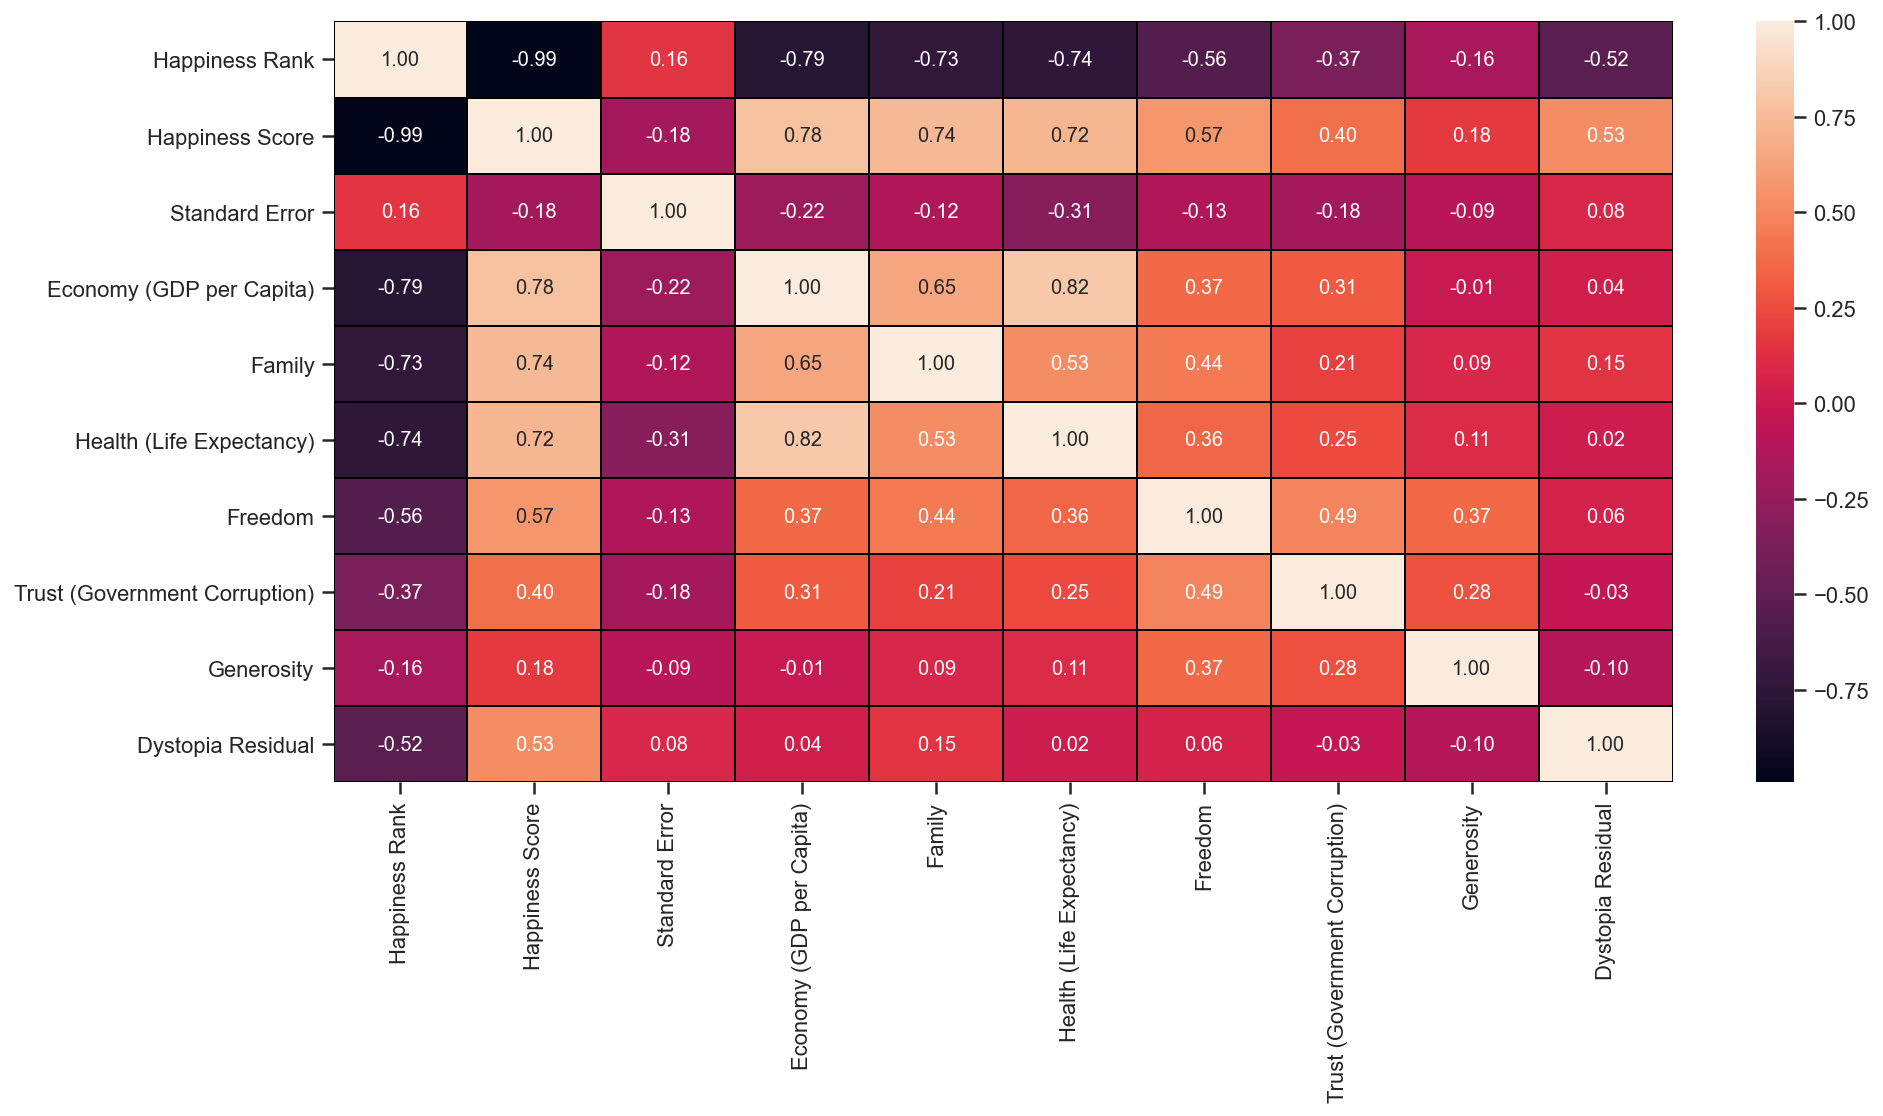

In [59]:

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='.2f',linecolor='black' )

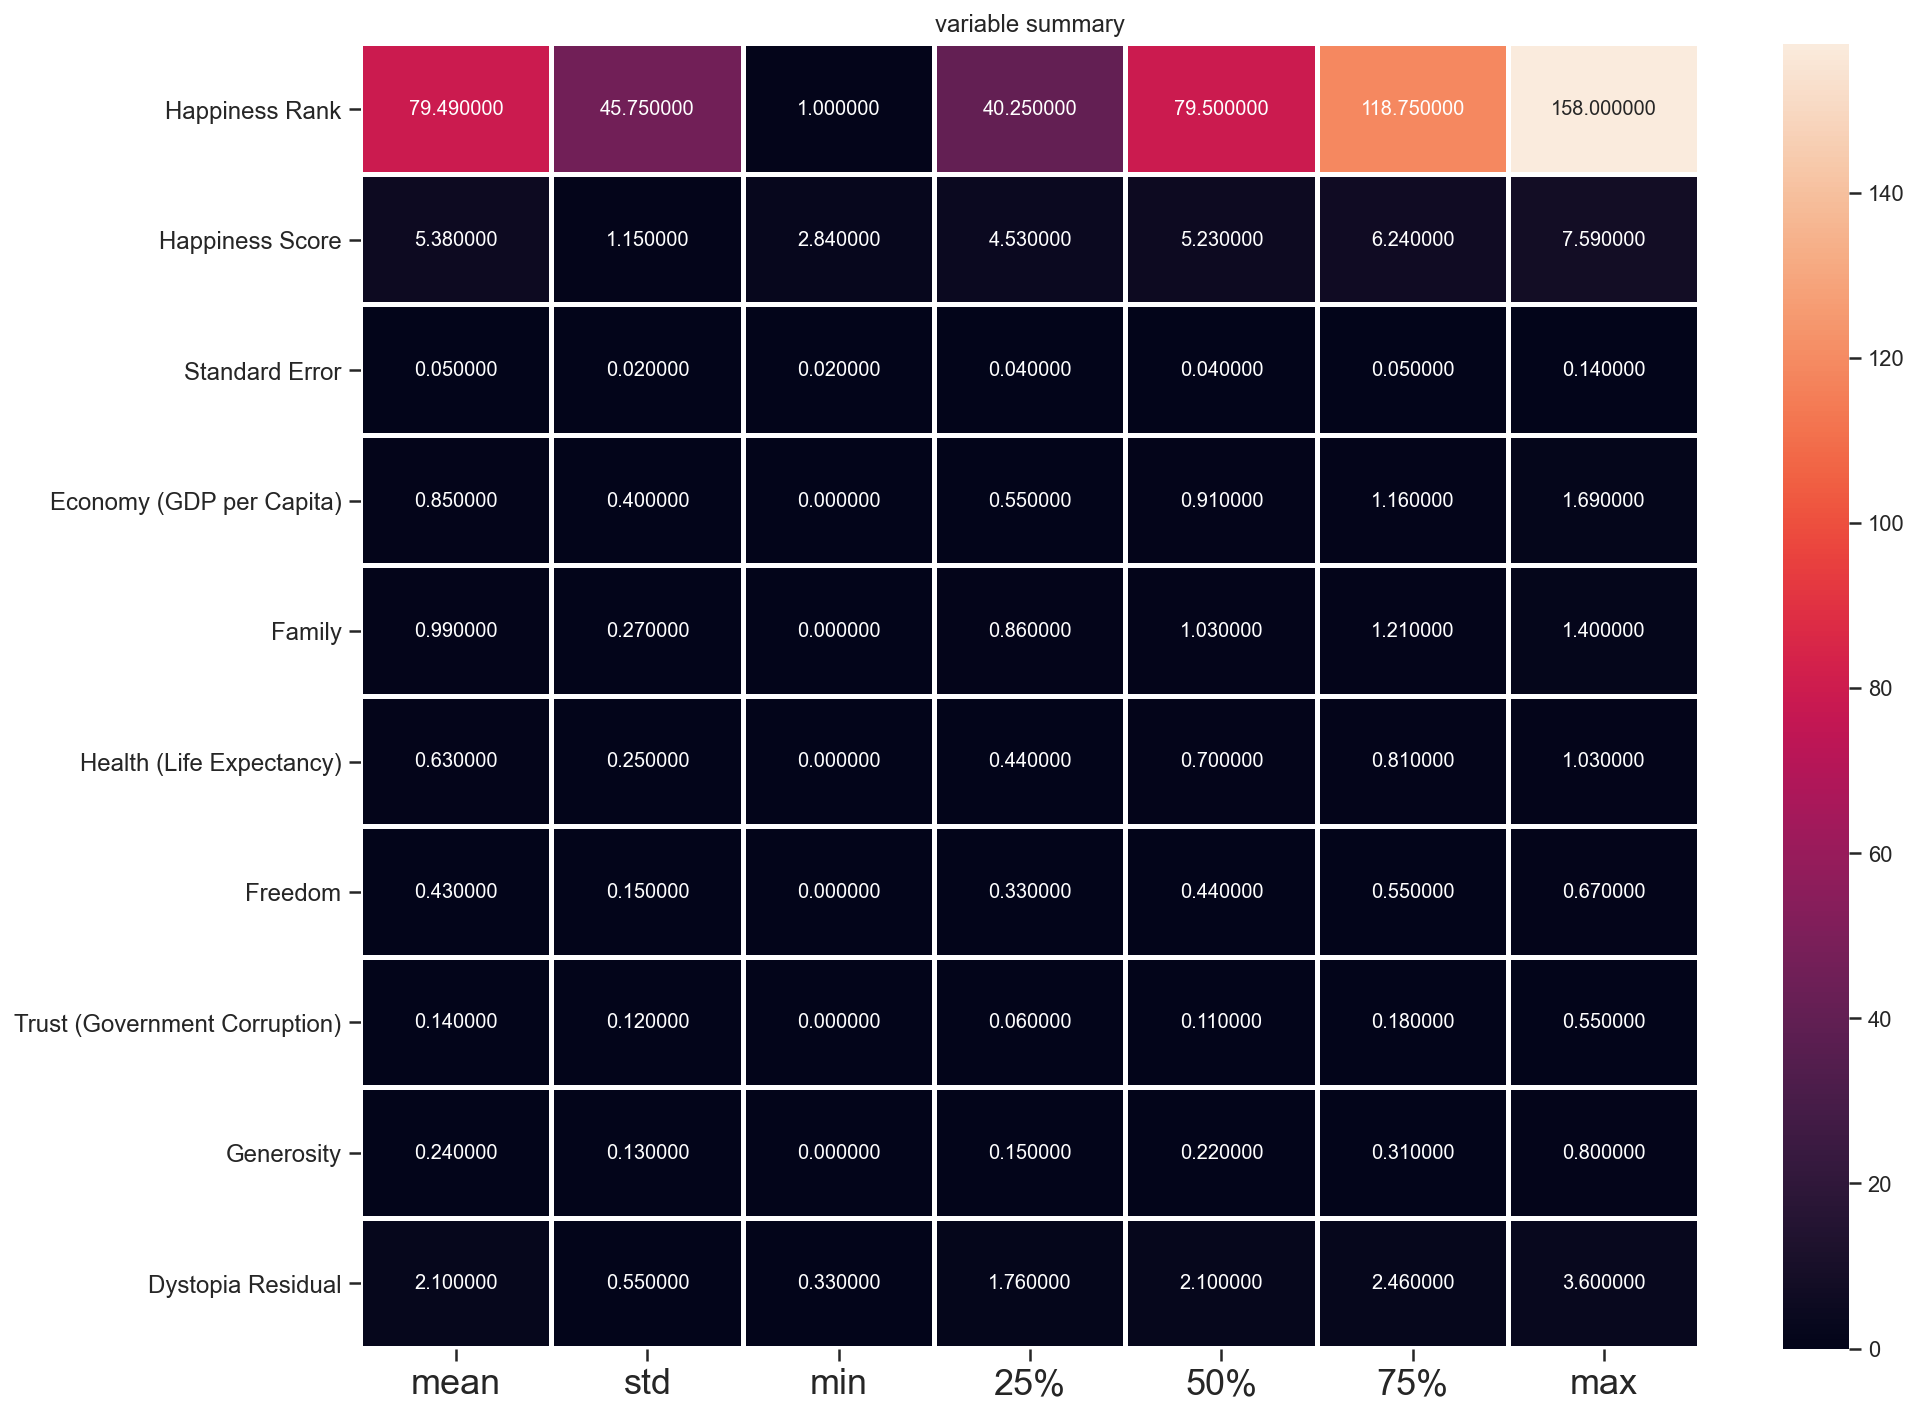

In [61]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show()

In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

outliner  Checking

TypeError: Horizontal orientation requires numeric `x` variable.

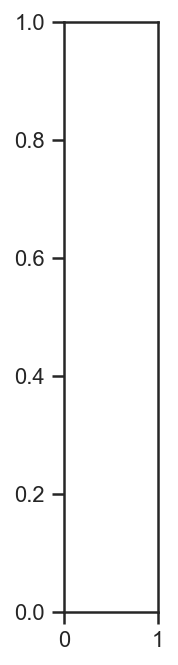

In [80]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(30,90))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
   #error i found here 
    sns.boxplot(df[collist[i]], color='green', orient='v')
    plt.tight_layout()

In [14]:
df.groupby(['Country']).max()['Happiness Score']

Country
Afghanistan    3.575
Albania        4.959
Algeria        5.605
Angola         4.033
Argentina      6.574
               ...  
Venezuela      6.810
Vietnam        5.360
Yemen          4.077
Zambia         5.129
Zimbabwe       4.610
Name: Happiness Score, Length: 158, dtype: float64

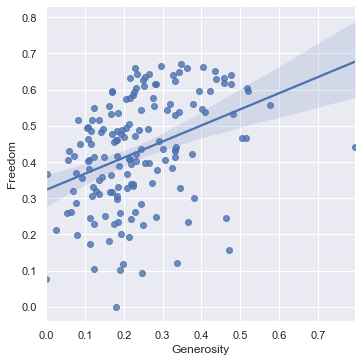

In [15]:
sns.lmplot(x="Generosity", y = 'Freedom', data = df)

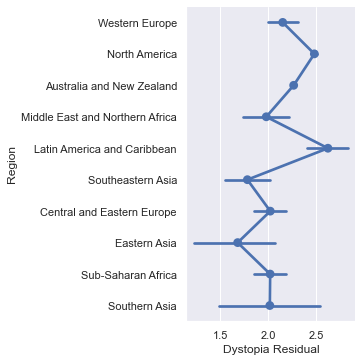

In [16]:
sns.factorplot(x='Dystopia Residual',
               y= 'Region',
               data=df)

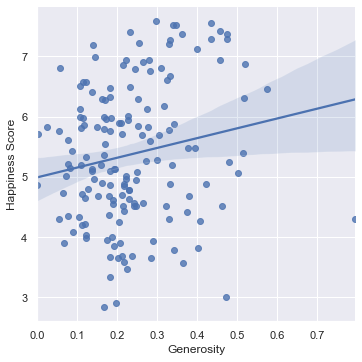

In [17]:
sns.lmplot(x="Generosity", y = 'Happiness Score', data = df)

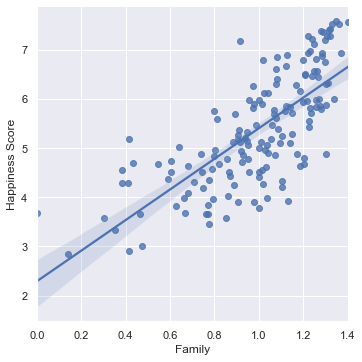

In [18]:
sns.lmplot(x="Family", y = 'Happiness Score', data = df)

# Part II visualization

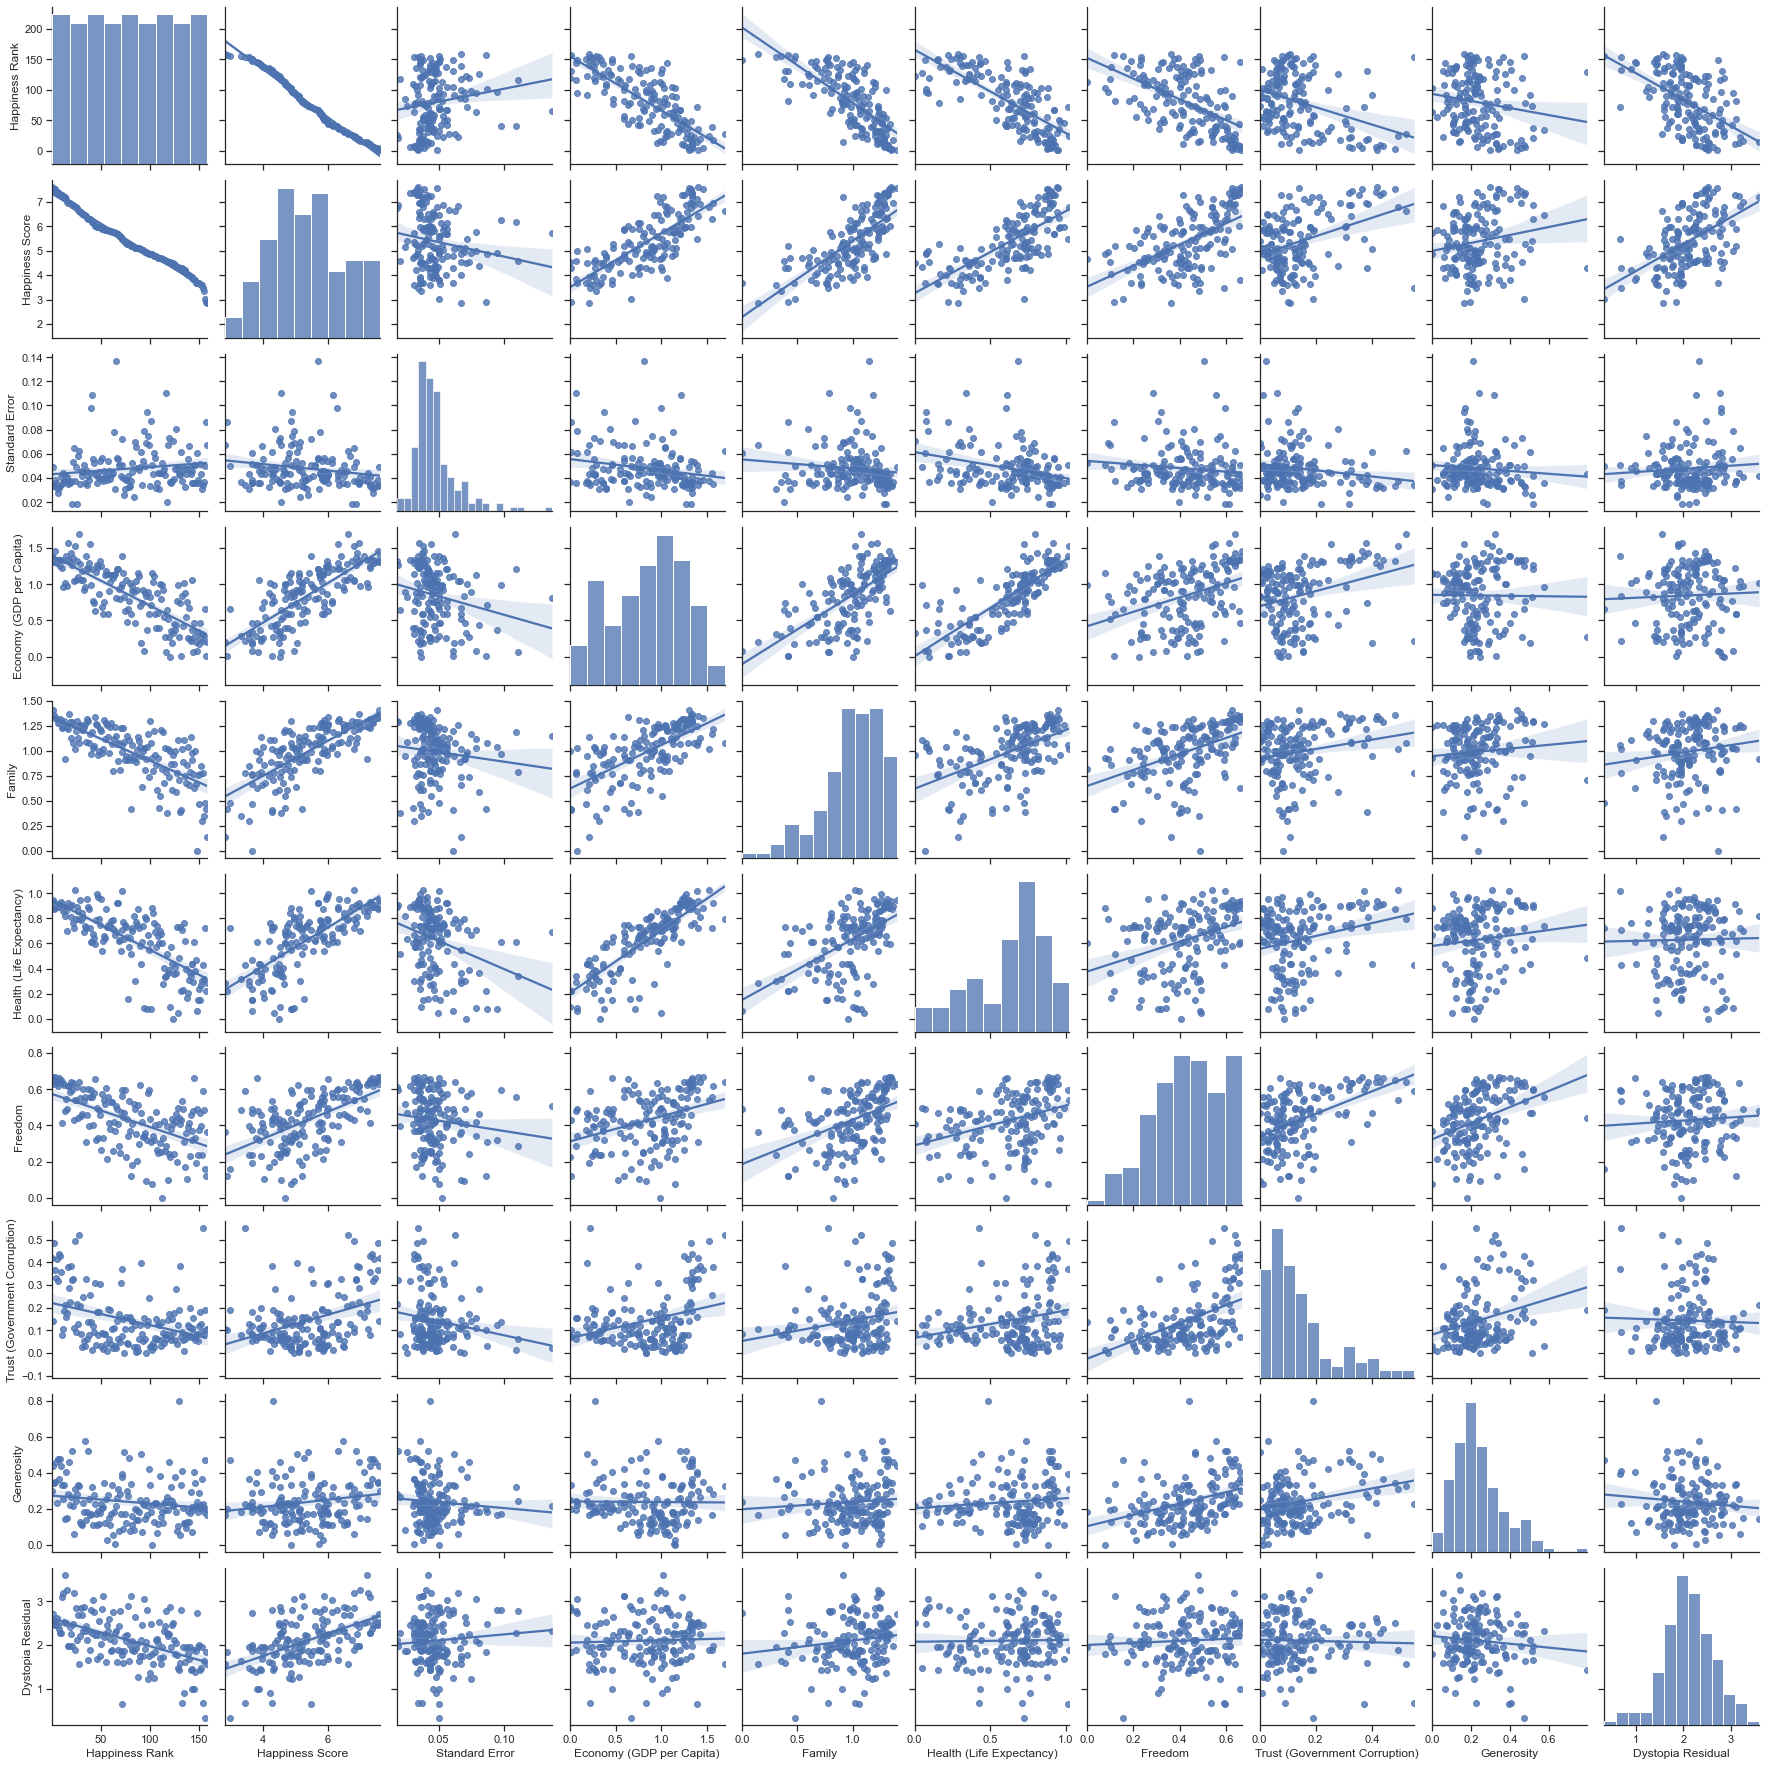

In [29]:
#Let's check all columns by pair plot 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, kind="reg")

Scatterplots show possible associations or relationships between two variables. I wanted to see each variable positive and negative relationships, uphill lines are showing positive, downhill lines are negative relationships. In above plots are showing that we have weaker, stronger relationships. To quantify the strength of a linear (straight) relationship, we will use a correlation analysis.

<AxesSubplot:>

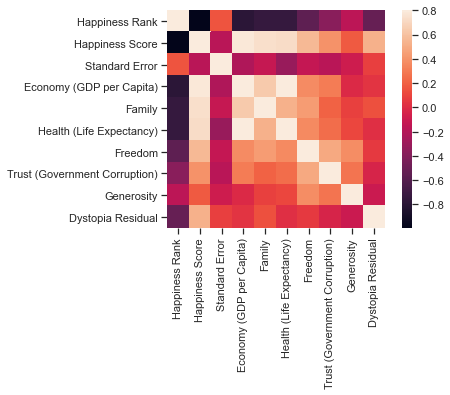

In [30]:
#Check correlation of each values 
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

Above 2 graphs are showing us how is the correlation between each variable, we will concentrate the highly correlated variables. Happiness Rank and Happiness Score have negative correlation, while Happiness Score is increasing, Ranking is going to decrease (1 is the top, 155 is the last ranking). Therefore, we will analyze Happiness Score relations with GDP, Life Expectations, Freedom and Trust to Government Corruption as these values are highly correlated to each other. GDP is the main factor which is effecting others as Family, Life Expectations and Freedom

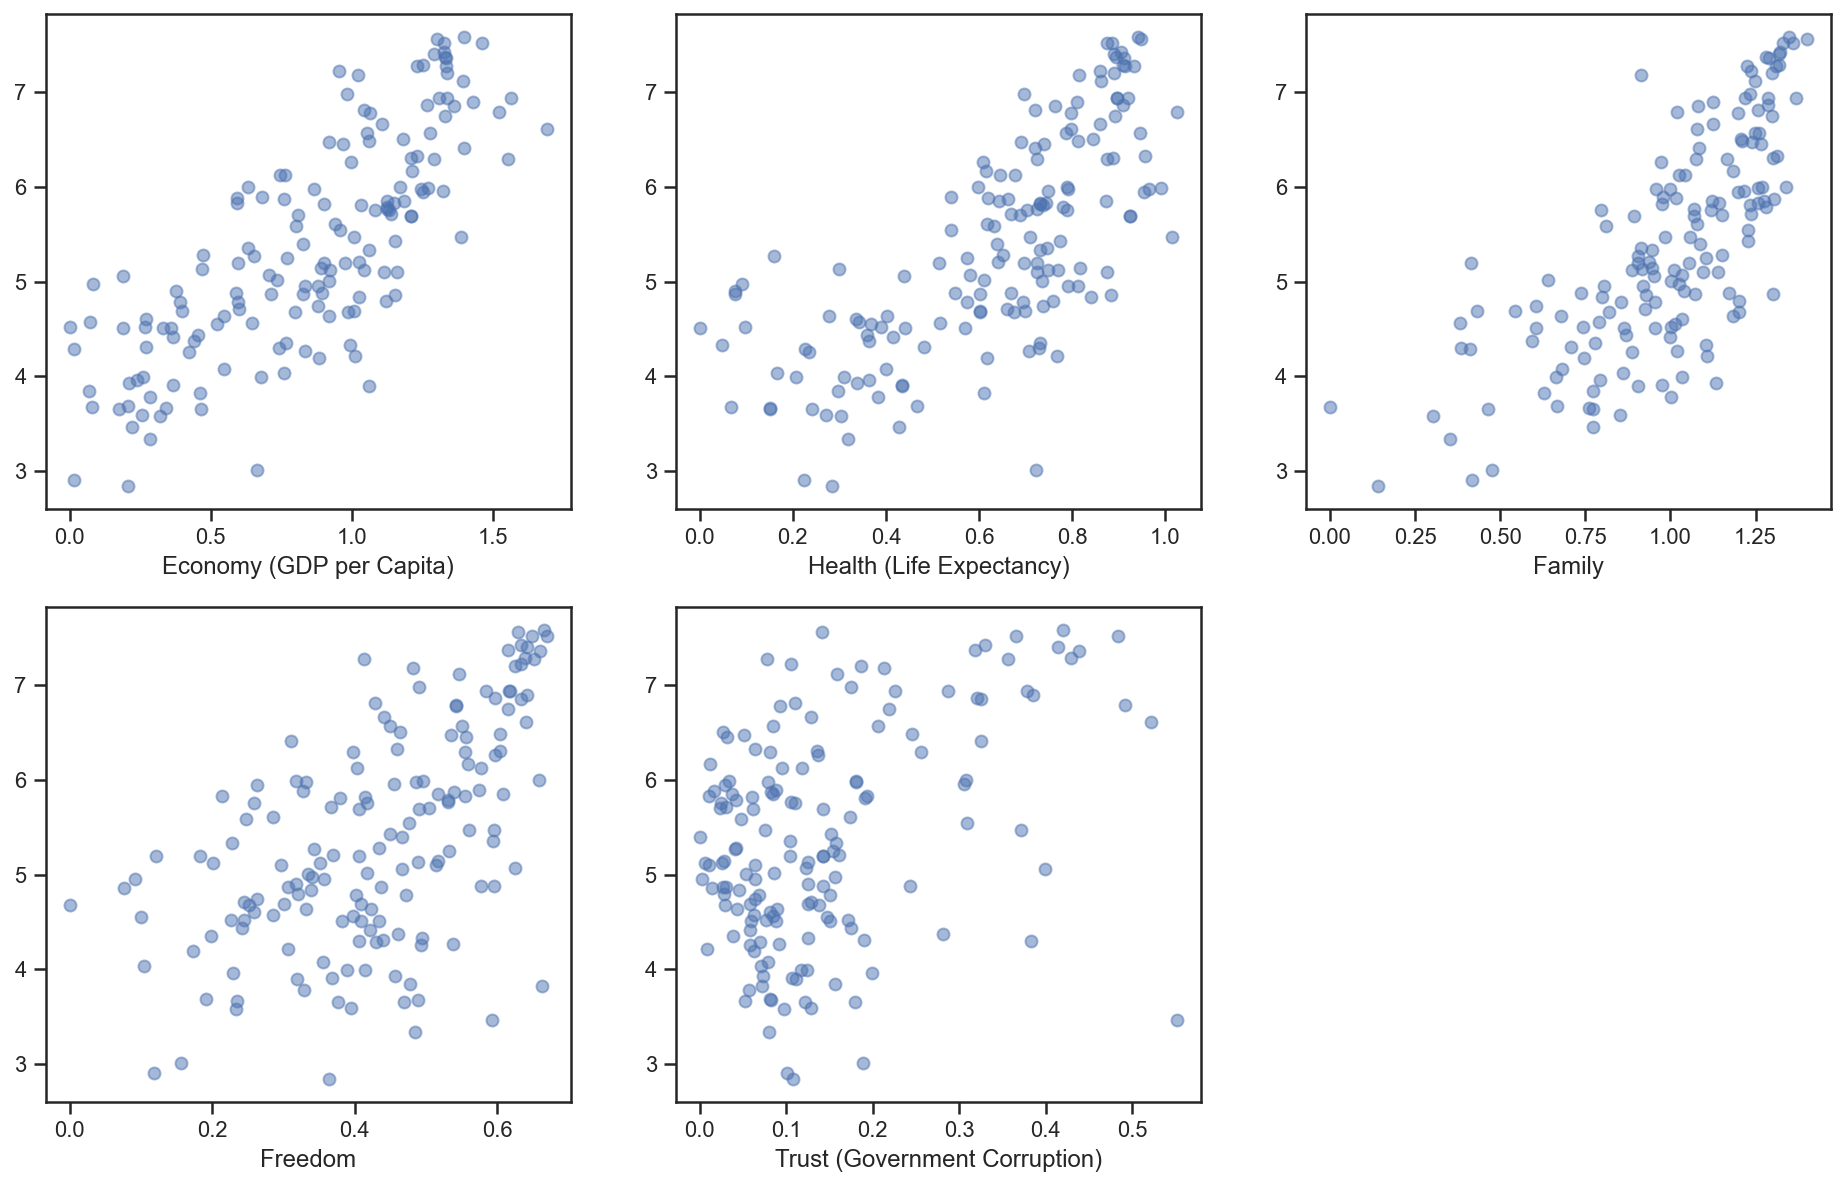

In [42]:
#let's check highly correlated columns separately 

%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(16, 10))
for i, key in enumerate([ 'Economy (GDP per Capita)','Health (Life Expectancy)' ,'Family', 'Freedom', 'Trust (Government Corruption)']):
    plt.subplot(2, 3, i+1)
    plt.xlabel(key)
    plt.scatter(df[key], df['Happiness Score'], alpha=0.5)

DecisionTree using Worldhappiness data

In [43]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
data_set= pd.read_csv(r'C:\Users\Admin\Desktop\Dataset\DSData-master\DSData-master\happiness_score_dataset.csv')  
  
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [46]:
#Fitting Decision Tree classifier to the training set  
From sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

SyntaxError: invalid syntax (<ipython-input-46-28d179f86871>, line 2)

In [45]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  


NameError: name 'classifier' is not defined